In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim, GoogleV3

%matplotlib inline

In [2]:
#opening shapefile

path = '/home/pier/Desktop/Python/GIS/GISfile/states.shp'
states = gpd.read_file(path)
states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [3]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_NAME  51 non-null     object  
 1   DRAWSEQ     51 non-null     int64   
 2   STATE_FIPS  51 non-null     object  
 3   SUB_REGION  51 non-null     object  
 4   STATE_ABBR  51 non-null     object  
 5   geometry    51 non-null     geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 2.5+ KB


<AxesSubplot:>

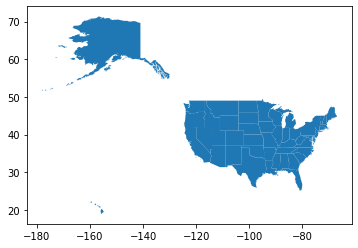

In [4]:
states.plot()

### Opening CSV file ###

1. Opening up the CSV with Pandas
2. We'll take lat/long from the csv and feed it to shapely, which creates a Point
3. Original dataframe and geometry together  --> GeoDataFrame
4. Tell the new GeoDataFrame that coords are lat/lon

In [8]:
df = pd.read_csv('GISfile/capitals.csv')
df.head()

,population,country,name,lat,long,countrycode,continent
0,2.4,Brazil,Brasilia,-15.783333,-47.916667,BR,South America
1,6.7,Colombia,Bogota,4.600000,-74.083333,CO,South America
2,7.8,Egypt,Cairo,30.050000,31.250000,EG,Africa
3,2.2,France,Paris,48.866667,2.333333,FR,Europe
4,3.8,Iraq,Baghdad,33.333333,44.400000,IQ,Asia


We want to convert Lat/Long

In [21]:
points = df.apply(lambda row: Point(row.long, row.lat), axis = 1)
points

0     POINT (-47.916667 -15.783333333333331)
1                     POINT (-74.083333 4.6)
2                        POINT (31.25 30.05)
3         POINT (2.333333 48.86666666666667)
4            POINT (44.4 33.333333333333336)
5                   POINT (126.983333 37.55)
6      POINT (-99.133333 19.433333333333334)
7       POINT (85.316667 27.716666666666665)
8        POINT (-9.133333 38.71666666666667)
9                      POINT (-77 38.883333)
10                 POINT (-56.166667 -34.85)
dtype: object

We obtain point for every single point in dataframe, create a geodataframe:

In [34]:
capitals = gpd.GeoDataFrame(df, geometry = points) #create the geometry column using points
capitals.crs = {'init': 'epsg:4326'} #to set long/lat in geometry
capitals.head()

/home/pier/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,population,country,name,lat,long,countrycode,continent,geometry
0,2.4,Brazil,Brasilia,-15.783333,-47.916667,BR,South America,POINT (-47.91667 -15.78333)
1,6.7,Colombia,Bogota,4.600000,-74.083333,CO,South America,POINT (-74.08333 4.60000)
2,7.8,Egypt,Cairo,30.050000,31.250000,EG,Africa,POINT (31.25000 30.05000)
3,2.2,France,Paris,48.866667,2.333333,FR,Europe,POINT (2.33333 48.86667)
4,3.8,Iraq,Baghdad,33.333333,44.400000,IQ,Asia,POINT (44.40000 33.33333)


<AxesSubplot:>

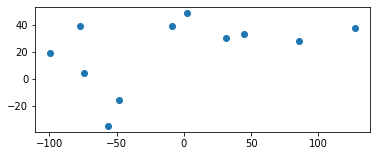

In [42]:
capitals.plot()

## GENERIC STEP TO DO EACH TIME

### 1. Read in our csv as a pandas dataframe: ###
df = pd.read_csv('GISfile/capitals.csv')
### 2. Created shapely Points from our lat/long 
points = df.apply(lambda row: Point(row.long, row.lat), axis = 1)
### 3. Make a GeoDataFrame out of df + new points
capitals = gpd.GeoDataFrame(df, geometry = points) #create the geometry column using points
### 4. Confirmed for the geodataframe that we're using lat/long
capitals.crs = {'init': 'epsg:4326'} #to set long/lat in geometry